In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scienceplots 
plt.style.use(['science', 'no-latex', 'notebook'])

In [2]:
data_folder_path = "/home/ruiz/Documents/polaritons/scripts/cpp/"
data = pd.read_csv(data_folder_path + "output_time.dat", delimiter= "\t", header = None).iloc[:, :-1]

In [4]:
data.head()

,0,1,2,3,4,5,6,7
0,0.000000,0.229257,0.521318,4.29477,7.13006,6.79031,95.5826,0.400246
1,0.000000,0.229257,0.521318,4.29477,7.13006,6.79031,95.5826,0.400246
2,0.000000,0.229257,0.521318,4.29477,7.13006,6.79031,95.5826,0.400246
3,0.000173,0.237630,0.516260,4.29464,7.12856,6.80679,95.1134,0.980671
4,0.000346,0.246060,0.511266,4.29450,7.12704,6.82319,94.6431,1.450300


In [3]:
time = data[0].to_numpy(dtype = float)
phi1_r = data[1].to_numpy(dtype = float)
phi1_i = data[2].to_numpy(dtype = float)
phi2_r = data[3].to_numpy(dtype = float)
phi2_i = data[4].to_numpy(dtype = float)
x = data[5].to_numpy(dtype = float)
v = data[6].to_numpy(dtype = float)
n = data[7].to_numpy(dtype = float)

In [4]:
phi1_mod = phi1_r**2 + phi1_i**2
phi2_mod = phi2_r**2 + phi2_i**2

(-1.0, 100.0)

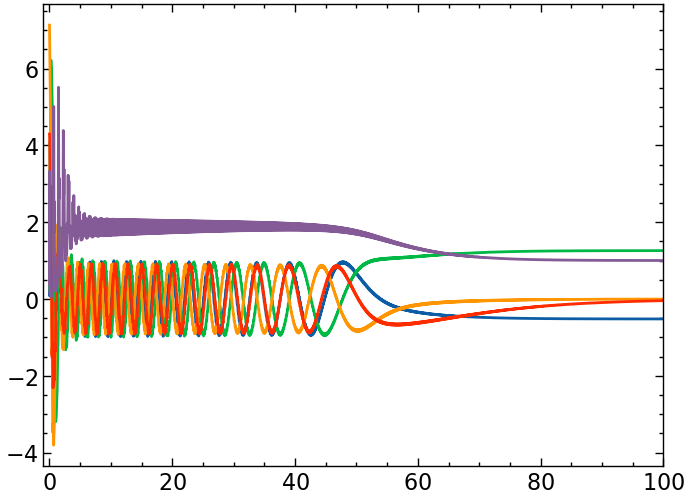

In [7]:
plt.plot(time, phi1_i)
plt.plot(time, phi1_r)
plt.plot(time, phi2_i)
plt.plot(time, phi2_r)
plt.plot(time, n)
# plt.xlim(400.0, 410.0)
# plt.xlim(300, 500)
plt.xlim(-1.0, 100)

In [9]:
f = (phi1_r + 1.0j * phi1_i) * (phi2_r -1.0j * phi2_i)*np.exp(-1.0j * 20.0 * time)


In [8]:
cx_phi1 = phi1_r + 1.0j * phi1_i
cx_phi2 = phi2_r + 1.0j * phi2_i


In [9]:
# Parameters
gamma1 = 1.0
gamma2 = 1.0
J = 0.0
g = 1.0
xi = 1.0
Omega = 20.0

# Compute derivatives according to the model
phi1_drv = -1.0j * (
    cx_phi1 * (-1.0j * gamma1 + 1.0j * xi * n) +
    (J + g * x) * np.exp(+1.0j * Omega * time) * cx_phi2
)

phi2_drv = -1.0j * (
    cx_phi2 * (-1.0j * gamma2) +
    (J + g * x) * np.exp(-1.0j * Omega * time) * cx_phi1
)

In [10]:
# More accurate derivative for non-uniform timesteps
dt = np.diff(time)
dphi1_dt = np.diff(cx_phi1) / dt
# Add a point to match array sizes
dphi1_dt = np.append(dphi1_dt, dphi1_dt[-1])

/tmp/ipykernel_30655/1696355221.py:3: RuntimeWarning: divide by zero encountered in divide
  dphi1_dt = np.diff(cx_phi1) / dt
/tmp/ipykernel_30655/1696355221.py:3: RuntimeWarning: invalid value encountered in divide
  dphi1_dt = np.diff(cx_phi1) / dt


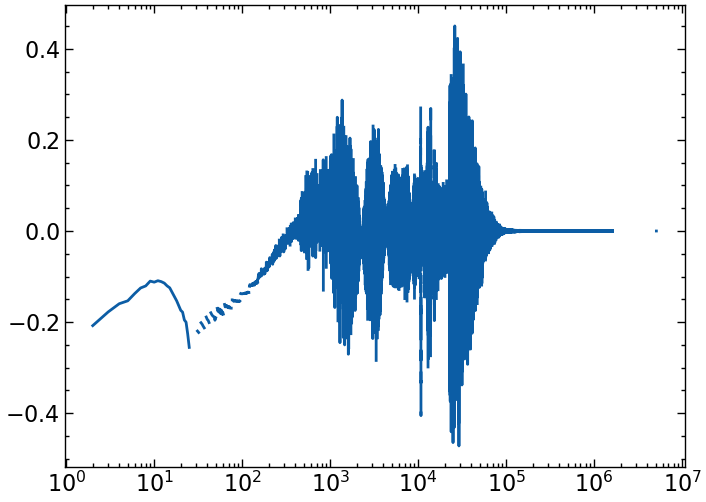

In [40]:
plt.plot((phi1_drv - dphi1_dt).imag)
# plt.xlim(0.0, 0.0025e6)
plt.xscale('log')

(0.0, 100000.0)

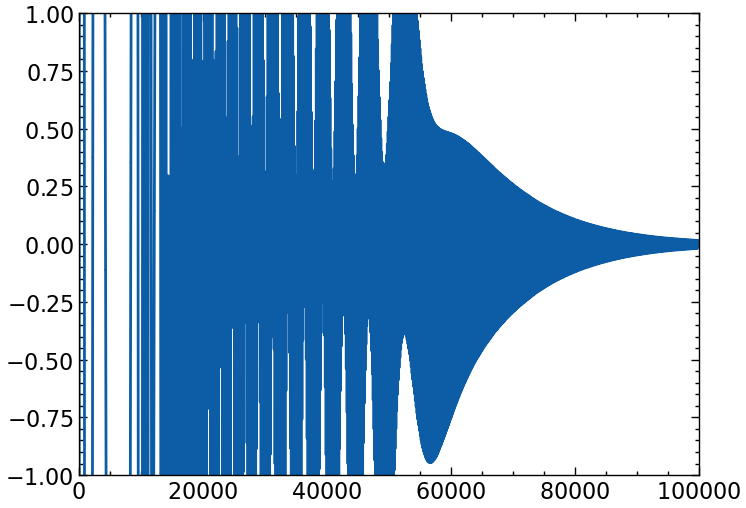

In [51]:
plt.plot(phi1_drv.imag)
plt.ylim(-1.0, 1.0)
plt.xlim(0.0, 0.1e6)

In [ ]:
def second_derivative(y, x):
    """
    Second derivative for non-uniform grids.
    Preserves array length.

    Parameters
    ----------
    y : array_like
        Function values y(x)
    x : array_like
        Grid points (not necessarily uniform)

    Returns
    -------
    d2y : np.ndarray
        Second derivative with same length as y
    """
    y = np.asarray(y, dtype=float)
    x = np.asarray(x, dtype=float)

    if len(y) != len(x):
        raise ValueError("x and y must have the same length")
    if len(y) < 3:
        raise ValueError("Need at least 3 points")

    d2y = np.zeros_like(y)

    # Interior points
    for i in range(1, len(y) - 1):
        h1 = x[i]   - x[i - 1]
        h2 = x[i+1] - x[i]

        d2y[i] = 2 * (
            (y[i+1] - y[i]) / h2 -
            (y[i]   - y[i-1]) / h1
        ) / (h1 + h2)

    # Left boundary (forward, non-uniform)
    h1 = x[1] - x[0]
    h2 = x[2] - x[1]
    d2y[0] = 2 * (
        (y[2] - y[1]) / h2 -
        (y[1] - y[0]) / h1
    ) / (h1 + h2)

    # Right boundary (backward, non-uniform)
    h1 = x[-2] - x[-3]
    h2 = x[-1] - x[-2]
    d2y[-1] = 2 * (
        (y[-1] - y[-2]) / h2 -
        (y[-2] - y[-3]) / h1
    ) / (h1 + h2)

    return d2y


In [11]:
ddot_x = second_derivative(x, time)

/tmp/ipykernel_30655/3797952098.py:34: RuntimeWarning: invalid value encountered in scalar divide
  (y[i+1] - y[i]) / h2 -
/tmp/ipykernel_30655/3797952098.py:35: RuntimeWarning: invalid value encountered in scalar divide
  (y[i]   - y[i-1]) / h1
/tmp/ipykernel_30655/3797952098.py:34: RuntimeWarning: divide by zero encountered in scalar divide
  (y[i+1] - y[i]) / h2 -
/tmp/ipykernel_30655/3797952098.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  (y[i]   - y[i-1]) / h1
/tmp/ipykernel_30655/3797952098.py:34: RuntimeWarning: invalid value encountered in scalar subtract
  (y[i+1] - y[i]) / h2 -
/tmp/ipykernel_30655/3797952098.py:42: RuntimeWarning: invalid value encountered in scalar divide
  (y[2] - y[1]) / h2 -
/tmp/ipykernel_30655/3797952098.py:43: RuntimeWarning: invalid value encountered in scalar divide
  (y[1] - y[0]) / h1
/tmp/ipykernel_30655/3797952098.py:51: RuntimeWarning: invalid value encountered in scalar divide
  (y[-2] - y[-3]) / h1


In [12]:
f = cx_phi1 * np.conj(cx_phi2) * np.exp(-1.0j * 20.0 * time)

In [13]:
x_ode =ddot_x + 400.0 * x + 0.05* v

(0.0, 100000.0)

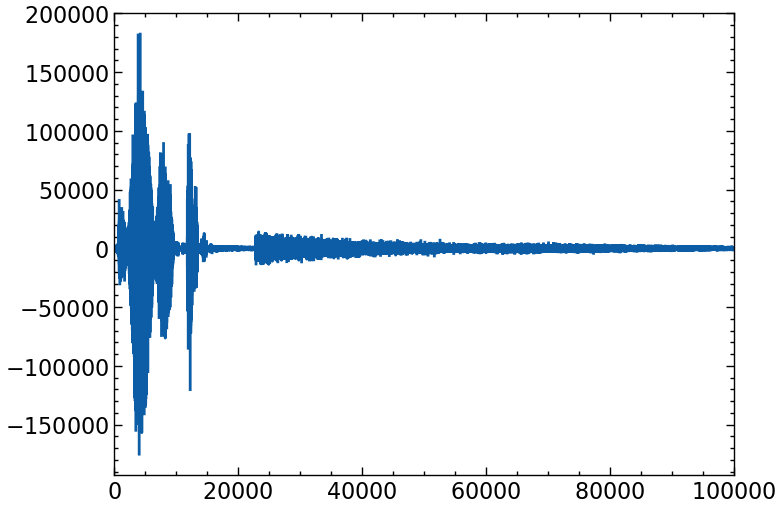

In [14]:
plt.plot(x_ode)
plt.xlim(0.0, 0.1e6)

(0.0, 100000.0)

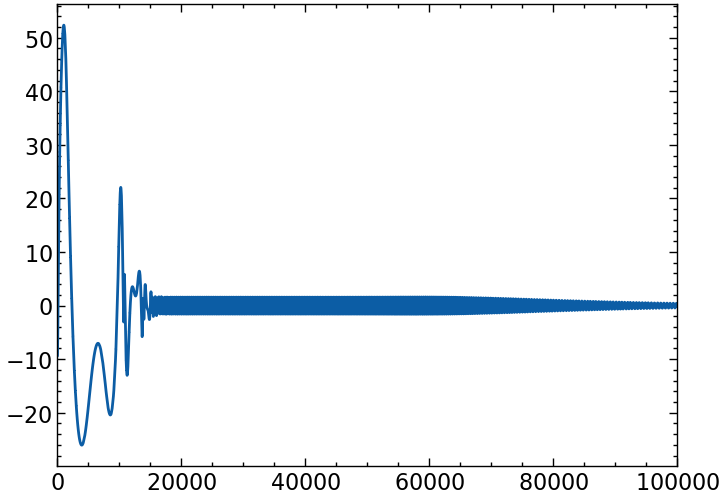

In [16]:
plt.plot(-2*20.0*0.05*f.real)
plt.xlim(0.0, 0.1e6)

(0.0, 100000.0)

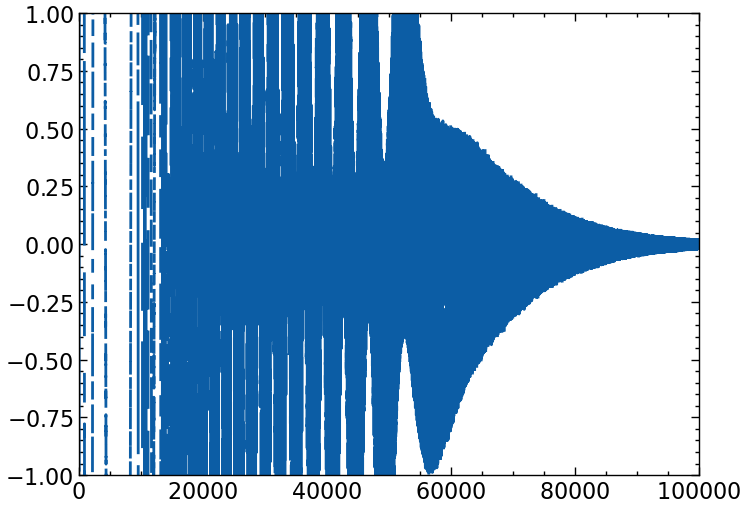

In [52]:
plt.plot(dphi1_dt.imag)
plt.ylim(-1.0, 1.0)
plt.xlim(0.0, 0.1e6)

(0.0, 100000.0)

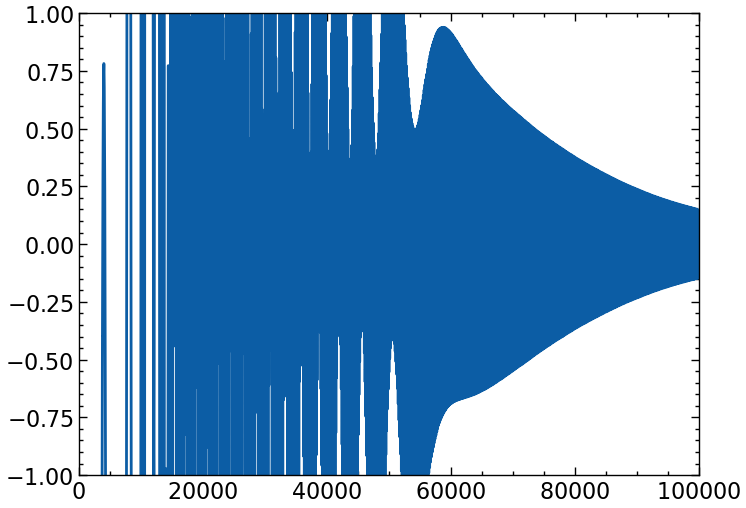

In [53]:
plt.plot(phi2_drv.imag)
plt.ylim(-1.0, 1.0)
plt.xlim(0.0, 0.1e6)

(0.0, 100000.0)

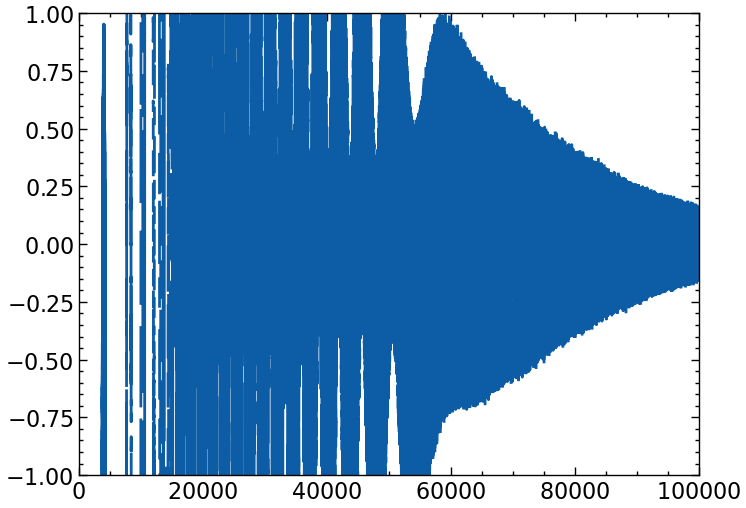

In [54]:
plt.plot(dphi2_dt.imag)
plt.ylim(-1.0, 1.0)
plt.xlim(0.0, 0.1e6)

In [32]:
dphi2_dt = np.diff(cx_phi2) / dt
# Add a point to match array sizes
dphi2_dt = np.append(dphi2_dt, dphi2_dt[-1])

/tmp/ipykernel_6129/4041131784.py:1: RuntimeWarning: divide by zero encountered in divide
  dphi2_dt = np.diff(cx_phi2) / dt
/tmp/ipykernel_6129/4041131784.py:1: RuntimeWarning: invalid value encountered in divide
  dphi2_dt = np.diff(cx_phi2) / dt


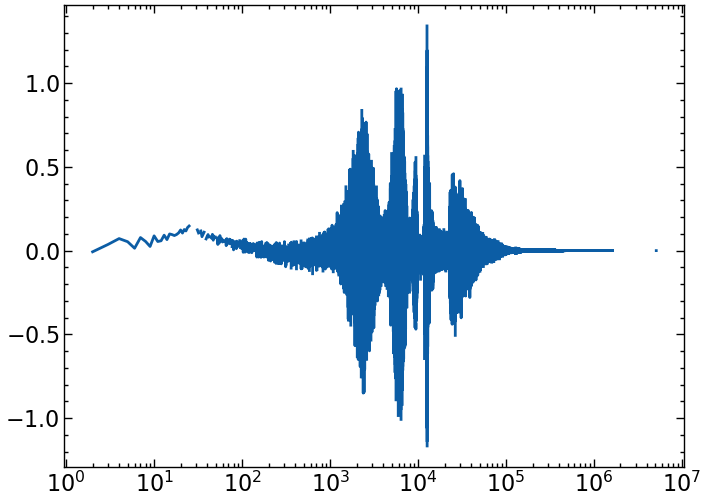

In [41]:
plt.plot((phi2_drv - dphi2_dt).imag)
plt.xscale('log')

(-1.5, 1.5)

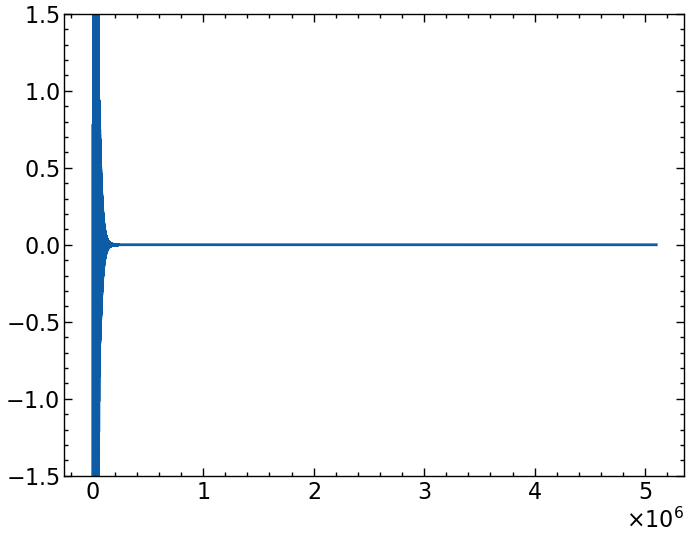

In [44]:
plt.plot(phi2_drv.imag)
plt.ylim(-1.5, 1.5)

(70.0, 100.0)

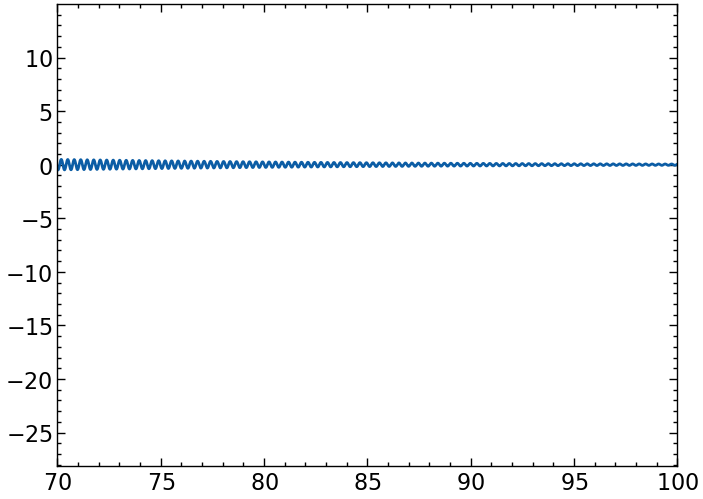

In [10]:
plt.plot(time, f.real)
plt.xlim(70.0, 100.0)

In [11]:
residue = np.gradient(v, time)-400.0 * x - 0.05 * v

/home/ruiz/miniconda3/envs/quantum/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2) / (dx1 * (dx1 + dx2))
/home/ruiz/miniconda3/envs/quantum/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:1309: RuntimeWarning: invalid value encountered in divide
  a = -(dx2) / (dx1 * (dx1 + dx2))
/home/ruiz/miniconda3/envs/quantum/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:1310: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/ruiz/miniconda3/envs/quantum/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:1310: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/ruiz/miniconda3/envs/quantum/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:1311: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/home/ruiz/miniconda3/envs/quantum/lib/python3.14/site-p

(0.0, 100.0)

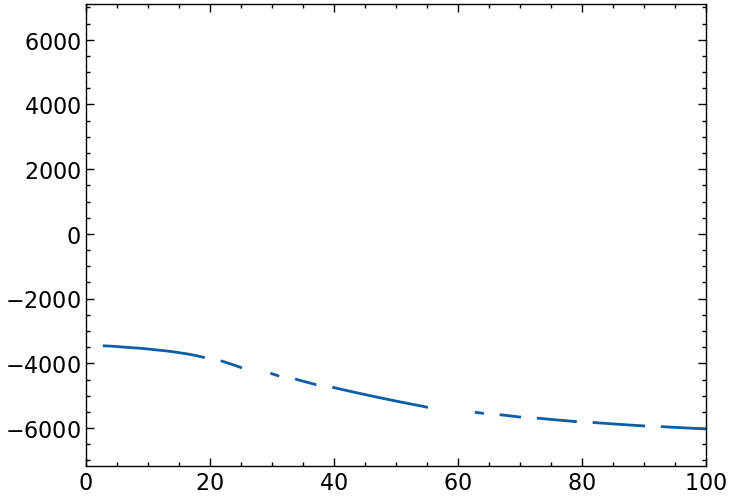

In [ ]:
plt.plot(residue - 2*20*0.05*f.real)
plt.xlim(0.0, 10rpoy00.0)

(0.0, 10.0)

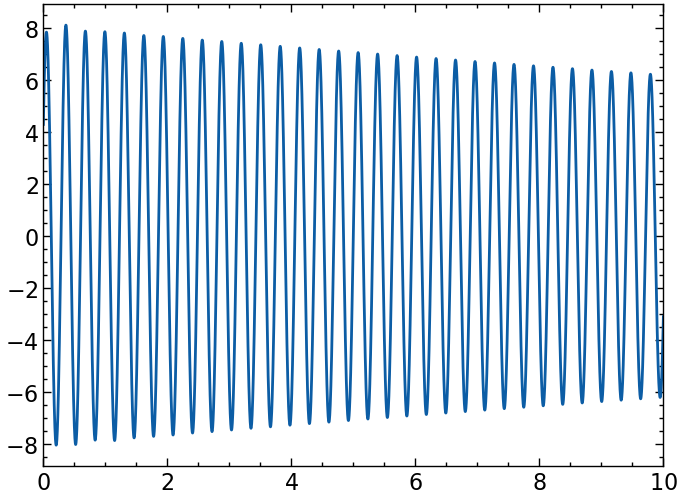

In [22]:
plt.plot(time, x)
plt.xlim(0.0, 10.0)

(0.0, 10.0)

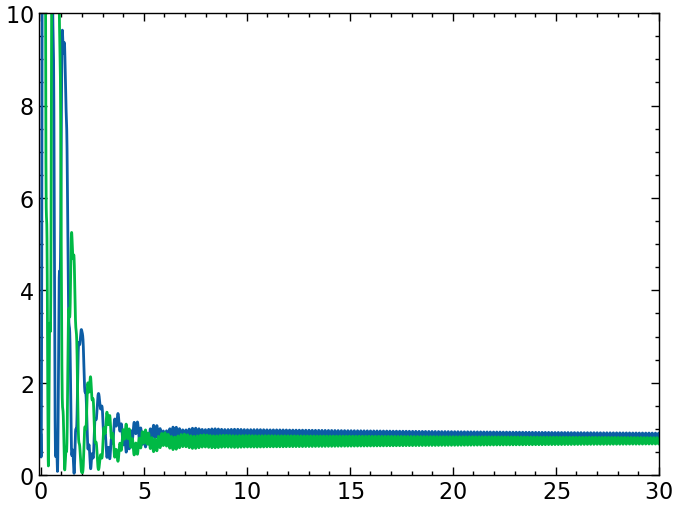

In [16]:
plt.plot(time, phi1_mod)
plt.plot(time, phi2_mod)
plt.xlim(-0.1, 30)
plt.ylim(0.0, 10.0)
# plt.xlim(400, 500

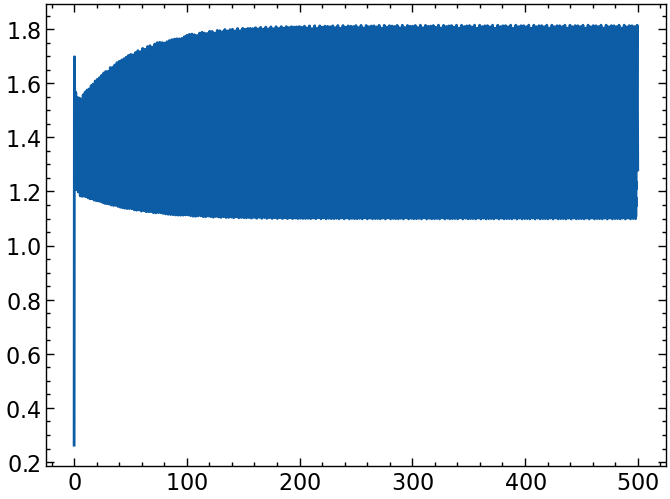

In [11]:
plt.plot(time, n)

In [161]:
mask = time > 300
time_new = time[mask]
phi1_i_new = phi1_i[mask]
phi1_r_new = phi1_r[mask]

In [164]:
delta_t = time[1]-time[0]

In [ ]:
from scipy.fft import fft, fft2

phi_fft = fft(phi1_r_new +1.0j*phi1_i_new)

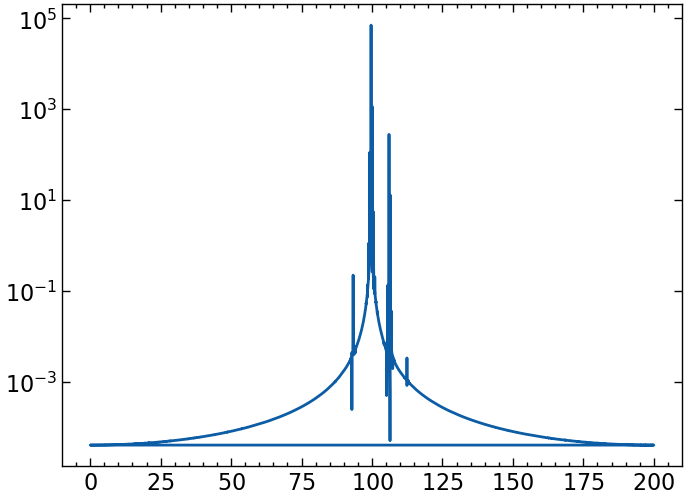

In [178]:
plt.plot(np.roll(np.arange(len(phi_fft))/(len(phi_fft) * delta_t), int(len(phi_fft)/2)), abs(phi_fft)**2/len(phi_fft))
plt.yscale('log')

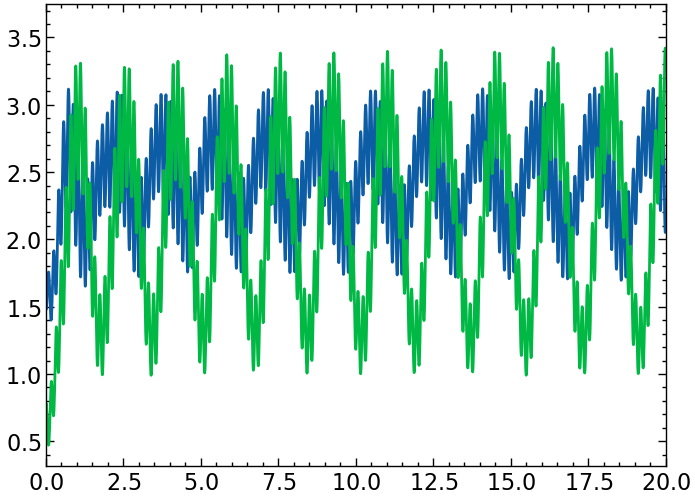

In [151]:
plt.xlim(0.0, 20.0)
plt.plot(time, phi1_mod)
plt.plot(time, phi2_mod)


(400.0, 500.0)

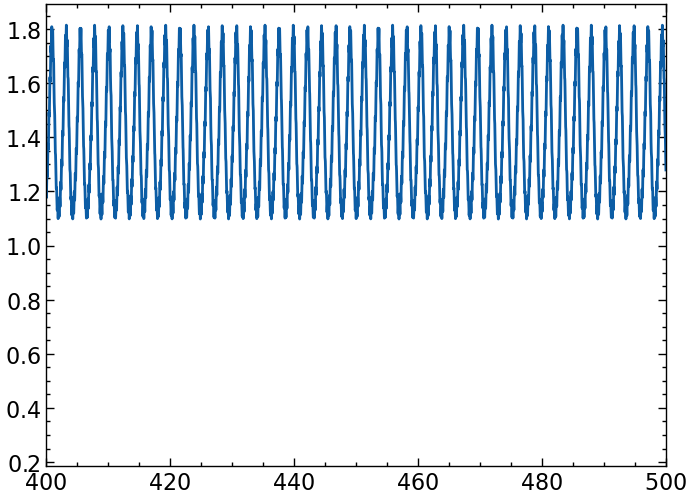

In [154]:
plt.plot(time, n)
plt.xlim(400.0, 500.0)
# plt.yscale('log')

(300.0, 310.0)

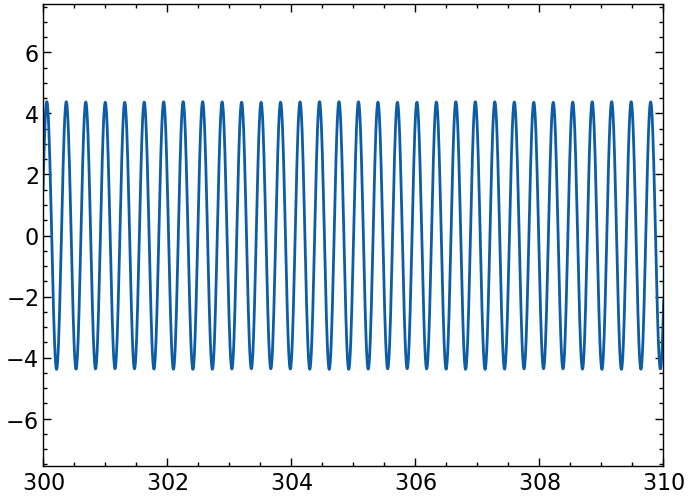

In [156]:
plt.plot(time, x)
plt.xlim(300.0, 310.0)

In [17]:
data_folder_path = "/home/ruiz/Documents/polaritons/data/processed/"
data = pd.read_csv(data_folder_path + "nonResonantSweepBuilt.dat", delimiter= "\t", header = None).iloc[:, :-1]

In [18]:
data.head()

,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,6.174560e-07,0
1,0.306122,0.000000,0.093711,0.000000,1.530610e-01,0
2,0.612245,0.000000,0.374844,0.000000,3.061230e-01,0
3,0.918367,0.121411,0.670727,0.162630,3.292760e-01,0
4,1.224490,0.422035,0.741610,0.632542,2.582170e-01,0


(0.0, 3.0)

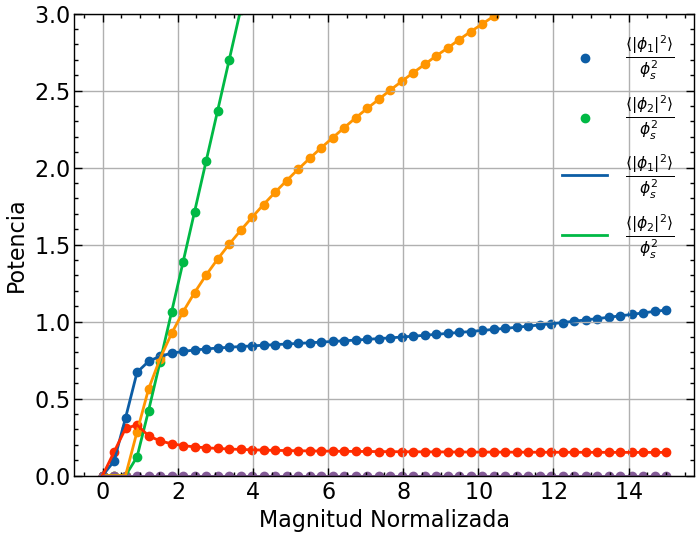

In [23]:
plt.scatter(data[0], data[2], label = r'$\frac{\langle \vert \phi_1\vert^2 \rangle}{\phi_s^2}$')
plt.scatter(data[0], data[1], label = r'$\frac{\langle \vert \phi_2\vert^2 \rangle}{\phi_s^2}$')
plt.scatter(data[0], np.sqrt(data[3]/2))
plt.scatter(data[0], data[4])
plt.scatter(data[0], data[5])
plt.plot(data[0], data[2], label = r'$\frac{\langle \vert \phi_1\vert^2 \rangle}{\phi_s^2}$')
plt.plot(data[0], data[1], label = r'$\frac{\langle \vert \phi_2\vert^2 \rangle}{\phi_s^2}$')
plt.plot(data[0], np.sqrt(data[3]/2))
plt.plot(data[0], data[4])
plt.plot(data[0], data[5])
plt.grid(True)
plt.xlabel('Magnitud Normalizada')
plt.ylabel('Potencia')
plt.legend()
plt.ylim(0.0, 3.0)

